In [1]:
from Bio import SeqIO

# FASTA archive path
fasta_path = "../Data/ecoli.fasta"

# Read the archive sequence
record = SeqIO.read(fasta_path, "fasta")

# Basic information
print("🔬 E. coli Genomic Analysis")
print("-" * 40)
print(f"ID: {record.id}")
print(f"Description: {record.description}")
print(f"Sequence lenght: {len(record.seq):,} bases")

# GC Calc%
gc_count = record.seq.count("G") + record.seq.count("C")
gc_percent = gc_count / len(record.seq) * 100
print(f"GC content: {gc_percent:.2f}%")

# AT Calc%
at_count = record.seq.count("A") + record.seq.count("T")
at_percent = at_count / len(record.seq) * 100
print(f"AT content: {at_percent:.2f}%")


🔬 E. coli Genomic Analysis
----------------------------------------
ID: NC_000913.3
Description: NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
Sequence lenght: 4,641,652 bases
GC content: 50.79%
AT content: 49.21%


In [2]:
#Nitrogenous base counts
base_counts = {
    "A": record.seq.count("A"),
    "T": record.seq.count("T"),
    "G": record.seq.count("G"),
    "C": record.seq.count("C"),
}

print("\nNitrogenous base counts:")
for base, count in base_counts.items():
    print(f"{base}: {count:,} ({(count / len(record.seq) * 100):.2f}%)")


Nitrogenous base counts:
A: 1,142,742 (24.62%)
T: 1,141,382 (24.59%)
G: 1,177,437 (25.37%)
C: 1,180,091 (25.42%)


In [3]:
# Count of pairs linked

from collections import Counter

pares = {
    "A-T": record.seq.count("AT") + record.seq.count("TA"),
    "G-C": record.seq.count("GC") + record.seq.count("CG"),
}

print("\nCount of pairs linked:")
for par, count in pares.items():
    print(f"{par}: {count:,} ({(count / (len(record.seq) - 1) * 100):.2f}%)")



Count of pairs linked:
A-T: 521,974 (11.25%)
G-C: 730,895 (15.75%)


In [5]:
# Count of a specific sequence in a FASTA file

# Input the sequence to search for in "seq"
# Example: "ATG" for the start codon
seq = "ATG"
seq_count = record.seq.count(seq)
print(f"Ocorrence number of {seq} in the sequence: {seq_count}")

Ocorrence number of ATG in the sequence: 76282


In [ ]:
# Search for regions rich in GC and AT content
# Define thresholds for GC and AT content
gc_regioes = []
at_regioes = []
gc_rgcount = 0
at_rgcount = 0
for i in range(len(record.seq) - 999):
    subseq = record.seq[i:i+1000]
    if len(subseq) < 1000:
        continue
    gc_content = (subseq.count("G") + subseq.count("C")) / len(subseq) * 100
    at_content = (subseq.count("A") + subseq.count("T")) / len(subseq) * 100
    if gc_content > 70:
        #print(f"Região rica em GC encontrada: Região {i} (GC content: {gc_content:.2f}%)")
        gc_rgcount += 1
        gc_regioes.append(f"Region {i}")
    elif at_content > 70:
        #print(f"Região rica em AT encontrada: Região {i} (AT content: {at_content:.2f}%)")
        at_rgcount += 1
        at_regioes.append(f"Region {i}")
print(f"\nTotal of GC-rich regions: {gc_rgcount}")
print(f"Total of AT-rich regions: {at_rgcount}")
print(f"GC-rich regions: {gc_regioes}")
print(f"AT-rich regions: {at_regioes}")


Total of GC-rich regions: 30
Total of AT-rich regions: 2384
GC-rich regions: ['Região 283409', 'Região 283410', 'Região 283411', 'Região 283412', 'Região 283413', 'Região 283414', 'Região 283415', 'Região 283418', 'Região 283419', 'Região 283420', 'Região 283421', 'Região 283422', 'Região 283434', 'Região 283442', 'Região 283443', 'Região 283444', 'Região 283445', 'Região 283446', 'Região 283454', 'Região 283455', 'Região 283474', 'Região 283475', 'Região 283476', 'Região 283477', 'Região 283478', 'Região 283481', 'Região 283482', 'Região 283483', 'Região 283484', 'Região 283490']
AT-rich regions: ['Região 583057', 'Região 583058', 'Região 583059', 'Região 583060', 'Região 583061', 'Região 583062', 'Região 583063', 'Região 583064', 'Região 583065', 'Região 583066', 'Região 583067', 'Região 583068', 'Região 583069', 'Região 583070', 'Região 583071', 'Região 583072', 'Região 583073', 'Região 583074', 'Região 583075', 'Região 583076', 'Região 583077', 'Região 583078', 'Região 583079', 'R

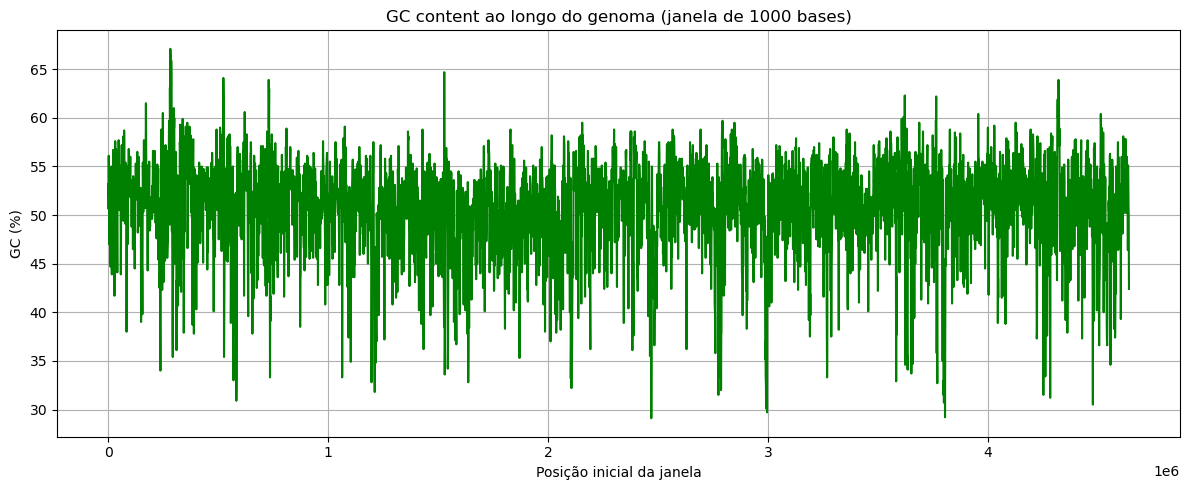

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO

# FASTA archive path
fasta_path = "../Data/ecoli.fasta"

# Read the archive sequence
record = SeqIO.read(fasta_path, "fasta")
sequence = str(record.seq)

# Window size for GC content calculation
window_size = 1000
gc_content = []

# Calculate GC content in sliding windows
for i in range(0, len(sequence) - window_size + 1, window_size):
    window = sequence[i:i+window_size]
    gc = (window.count("G") + window.count("C")) / window_size * 100
    gc_content.append(gc)

positions = np.arange(0, len(gc_content)) * window_size

# Plot
plt.figure(figsize=(12,5))
plt.plot(positions, gc_content, color='green')
plt.xlabel("Posição inicial da janela")
plt.ylabel("GC (%)")
plt.title("GC content ao longo do genoma (janela de 1000 bases)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from BCBio import GFF
from Bio import SeqIO

# Caminho para os arquivos
gff_file = "../Data/ecoli.gff"
fasta_file = "../Data/ecoli.fasta"

# Lê o genoma com anotações
with open(gff_file) as gff_handle, open(fasta_file) as fasta_handle:
    for record in GFF.parse(gff_handle, base_dict=SeqIO.to_dict(SeqIO.parse(fasta_handle, "fasta"))):
        print(f"Contig: {record.id}")
        print(f"Tamanho do contig: {len(record.seq)}")

        genes = [feature for feature in record.features if feature.type == "gene"]
        print(f"Número de genes anotados: {len(genes)}\n")

        for gene in genes[:5]:  # Mostra os 5 primeiros genes
            print(f"- Gene ID: {gene.qualifiers['ID'][0] if 'ID' in gene.qualifiers else 'Sem ID'}")
            print(f"  Localização: {gene.location}")
            print(f"  Informações extras: {gene.qualifiers}")
            print()


Contig: NC_000913.3
Tamanho do contig: 4641652
Número de genes anotados: 4494

- Gene ID: gene-b0001
  Localização: [189:255](+)
  Informações extras: {'ID': ['gene-b0001'], 'Dbxref': ['ASAP:ABE-0000006', 'ECOCYC:EG11277', 'GeneID:944742'], 'Name': ['thrL'], 'gbkey': ['Gene'], 'gene': ['thrL'], 'gene_biotype': ['protein_coding'], 'gene_synonym': ['ECK0001'], 'locus_tag': ['b0001'], 'source': ['RefSeq']}

- Gene ID: gene-b0002
  Localização: [336:2799](+)
  Informações extras: {'ID': ['gene-b0002'], 'Dbxref': ['ASAP:ABE-0000008', 'ECOCYC:EG10998', 'GeneID:945803'], 'Name': ['thrA'], 'gbkey': ['Gene'], 'gene': ['thrA'], 'gene_biotype': ['protein_coding'], 'gene_synonym': ['ECK0002', 'Hs', 'thrA1', 'thrA2', 'thrD'], 'locus_tag': ['b0002'], 'source': ['RefSeq']}

- Gene ID: gene-b0003
  Localização: [2800:3733](+)
  Informações extras: {'ID': ['gene-b0003'], 'Dbxref': ['ASAP:ABE-0000010', 'ECOCYC:EG10999', 'GeneID:947498'], 'Name': ['thrB'], 'gbkey': ['Gene'], 'gene': ['thrB'], 'gene_bioty